##### PAIR PROGRAMMING REGRESIÓN LINEAL 2 - TEST ESTADÍSTICOS


In [2]:
from scipy import stats
from scipy.stats import kurtosistest
from scipy.stats import skew
import statsmodels.api as sm
import ast
import warnings
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10, 8)

# Configuración warnings
# ======================
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista

# importamos la librería statsmodels para hacer el gráfico de cuantiles teóricos (Q-Q plot)

# importamos esta librería para calcular el sesgo (Skew)

# importamos esta libreria para calcular la curtosis

# importamos stats para test de shapiro

- OBJETIVOS:

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer

1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?


##### RESPUESTA

- El error de tipo I lo cometemos si rechazamos la hipótesis nula cuando es verdadera. La probabilidad de cometer este error es Alfa, que es el nivel de significancia que establecemos, normalmente es 0.05. Esto indica que estamos aceptando con una probabilidad del 5% estar rechazando la hipótesis nula.

- EL error de tipo II lo cometemos cuando la H0 es falsa y no la rechazamos, es decir, por ejemplo, en nuestro caso si decimos que la velocidad si afecta, pero en realidad no. La probabilidad de cometer este tipo de error es Beta, que depende de la potencia de la prueba. Podemos reducir el riesgo de cometer este error, si nos aseguramos de que la prueba tiene la suficiente potencia. Esto se consigue aumentando el tamaño de la muestra. 

2. ¿Qué es la asimetría?


- La asimetría es la falta de simetría que presenta una distribución, teniendo en cuenta la media. Una distribución asimétrica puede tener una curva
  sesgada hacia la derecha o la izquierda. La asimetría se puede determinar según la forma en que la media, la mediana y la moda de una distribución se relacionan entre sí. 
  - Podemos tener distribuciones asimétricas positivas cuando la media es mayor que la mediana y la moda.
  - Podemos tener distribuciones asimétricas negativas cuando la media es menor que la mediana y la moda.
  

3. ¿Es vuestra variable respuesta asimétrica?


In [3]:
df = pd.read_csv('../datos/pokePd1.csv', index_col = 0)
df.head()

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Grass,318,45,49,49,65,65,45
1,Poison,318,45,49,49,65,65,45
2,Grass,405,60,62,63,80,80,60
3,Poison,405,60,62,63,80,80,60
4,Grass,525,80,82,83,100,100,80


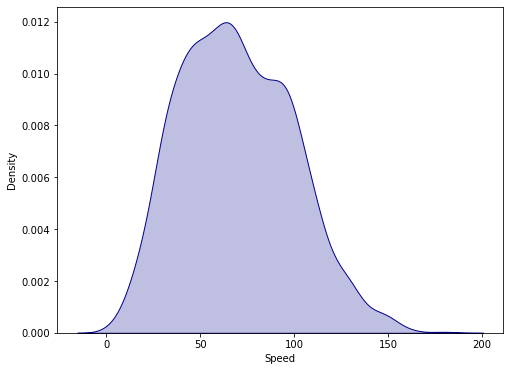

In [10]:
#Comprobamos que nuestra variable respuesta es asimétrica
plt.figure(figsize =(8,6))

sns.distplot(
    df['Speed'], 
    hist = False, 
    color = "darkblue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [5]:
df_numericas = df.select_dtypes(include= np.number)
df_numericas

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,318,45,49,49,65,65,45
1,318,45,49,49,65,65,45
2,405,60,62,63,80,80,60
3,405,60,62,63,80,80,60
4,525,80,82,83,100,100,80
...,...,...,...,...,...,...,...
1575,550,100,130,100,63,60,97
1576,550,100,130,100,63,60,97
1577,550,100,130,100,63,60,97
1578,600,105,120,105,70,95,105


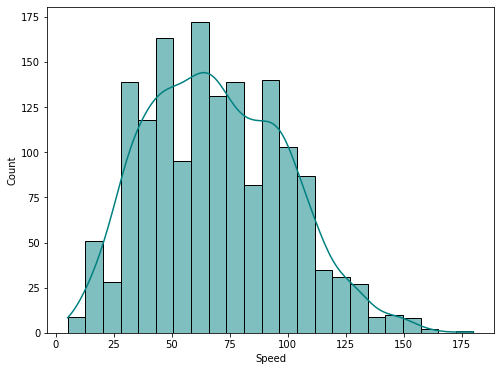

In [11]:
#Con el histograma representamos los datos observados de la variable respuesta "Velocidad" y una curva de ajuste, que es el parámetro kde
plt.figure(figsize =(8,6))

sns.histplot(df_numericas['Speed'], kde = True, color = 'teal');

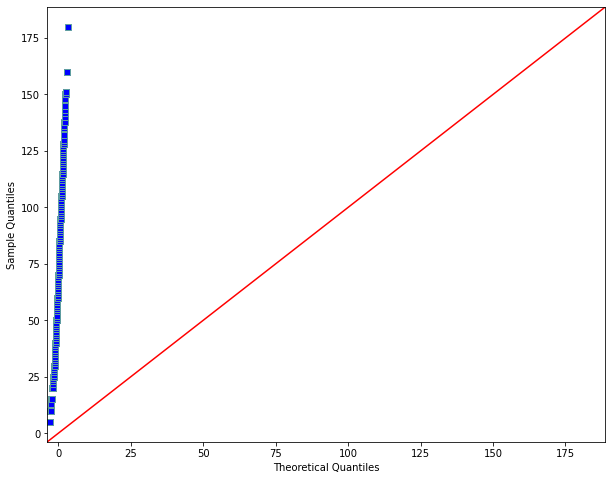

In [14]:
#Vemos que los datos no se acercan mucho a una campana de Gauss, así que vamos obtener el Q-Q plot:

sm.qqplot(df_numericas['Speed'], line = '45', color='cadetblue', marker= 's');

- Vemos que en nuestro caso esto no se cumple.
- A continuación, intentamos medir la simetría de nuestra variable respuesta.
- Observamos que se trata de una distribución asimetrica positiva y que, por lo tanto, nuestros datos NO van a ser normales.

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?


In [8]:
# la curtosis determina el grado de concentración que presentan los valores de una variable alrededor de la zona central de distribución de frecuencias
# es decir, la morfología de la curva
# nos da un valor de cero por lo que nuestra curtosis podría parecerse a una curtosis mesocurtica


kurtosistest(df_numericas['Speed'])

KurtosistestResult(statistic=-3.7961615242271596, pvalue=0.0001469537702137451)

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [9]:
#Realizamos el test de shapiro-wilk para obtener de forma analítica si nuestra VR es normal o no
#Vemos que el p-value es menor que 0.05 por lo que rechazamos la HO (los datos son normales): nuestros datos no son normales

stats.shapiro(df_numericas['Speed'])

ShapiroResult(statistic=0.9851946830749512, pvalue=1.1599554650132404e-11)